In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Fine Tuning the Models

**OBJECTIVES**:

- Use cross validation to train model
- Use grid search to select ideal parameters


In [2]:
x = np.linspace(0, 10, 100)
y = x + np.random.normal(1, 4, 100)

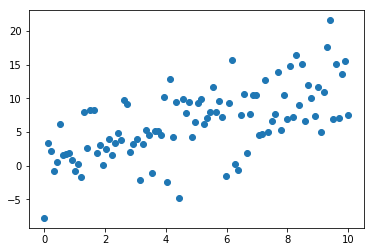

In [3]:
plt.scatter(x, y)

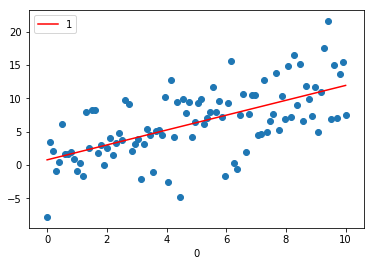

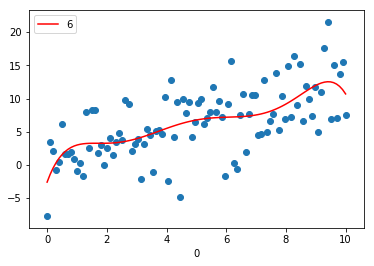

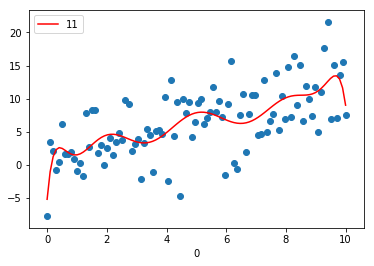

In [4]:
df = pd.DataFrame(x)
for i in range(1,16, 5):
    fit = np.polyfit(x, y, i)
    df[i] = np.polyval(fit, x)
    df = df.sort_values(0)
    df.plot(0, i, color = 'red')
    plt.scatter(x, y)

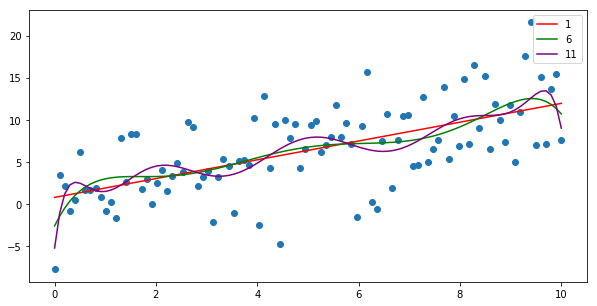

In [5]:
plt.figure(figsize = (10, 5))
plt.scatter(x, y)
plt.plot(df[0], df[1], color = 'red')
plt.plot(df[0], df[6], color = 'green')
plt.plot(df[0], df[11], color = 'purple')
plt.legend()

### Which is the Best?

If we are guided by RMSE, we can select the model that provides the lowest RMSE.  We want this to occur in the training phase, and we would like a few run throughs before selecting.  To do so, we will:

- Split data into train and test sets
- Create pipeline that includes `PolynomialFeatures`
- Use `GridSearchCV` to select best model
- Use that model to fit and predict with `best_estimator_` 

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error

In [7]:
#split the training and testing set
X_train, X_test, y_train, y_test = train_test_split(x, y)

In [8]:
#create empty pipeline
pipe = make_pipeline(PolynomialFeatures(), LinearRegression())

In [9]:
#parameters for the pipeline
degrees = {'polynomialfeatures__degree': [i for i in range(1, 10)]}

In [10]:
grid = GridSearchCV(pipe, param_grid=degrees)

In [11]:
grid.fit(X_train.reshape(-1,1), y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('polynomialfeatures', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('linearregression', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'polynomialfeatures__degree': [1, 2, 3, 4, 5, 6, 7, 8, 9]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [12]:
grid.best_estimator_

Pipeline(memory=None,
     steps=[('polynomialfeatures', PolynomialFeatures(degree=1, include_bias=True, interaction_only=False)), ('linearregression', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))])

In [13]:
best = grid.best_estimator_

In [44]:
best.fit(X_train.reshape(-1,1), y_train)
pred = best.predict(X_test.reshape(-1,1))
np.sqrt(mean_squared_error(pred, y_test))

3.587202602303124

In [15]:
y.mean()

6.370739150305938

In [16]:
y.min()

-7.755443987269418

In [17]:
y.max()

21.56289589991418

### Problem

1. Clean up data by dropping or imputing missing values
2. Code categorical features
3. Split data into train and test set using `train_test_split`
3. Select a few features you believe important and evaluate a `DummyRegressor`
4. Compare the performance of your dummy to that of a standard `LinearRegression` model.
5. Build a model using `PolynomialFeatures` together with the `GridSearchCV`.  
6. Discuss the performance of each in terms of RMSE.

In [18]:
ames = pd.read_csv('data/ames_housing.csv')

In [19]:
ames.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [20]:
ames.RoofMatl.value_counts()

CompShg    1434
Tar&Grv      11
WdShngl       6
WdShake       5
Roll          1
Membran       1
ClyTile       1
Metal         1
Name: RoofMatl, dtype: int64

In [21]:
ames.select_dtypes(include='object').columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [22]:
ames.BldgType.value_counts()

1Fam      1220
TwnhsE     114
Duplex      52
Twnhs       43
2fmCon      31
Name: BldgType, dtype: int64

In [23]:
ames.SaleCondition.value_counts()

Normal     1198
Partial     125
Abnorml     101
Family       20
Alloca       12
AdjLand       4
Name: SaleCondition, dtype: int64

In [24]:
ames.CentralAir.value_counts()

Y    1365
N      95
Name: CentralAir, dtype: int64

In [25]:
ames.KitchenQual.value_counts()

TA    735
Gd    586
Ex    100
Fa     39
Name: KitchenQual, dtype: int64

In [59]:
ames_nums = pd.get_dummies(ames, drop_first=True)

In [60]:
ames_nums.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,0,0,0,1,0,0,0,1,0
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,0,0,0,0,1,0,0,0,1,0
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,0,0,0,1,0,0,0,1,0
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,0,0,0,1,0,0,0,0,0
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,0,0,0,0,1,0,0,0,1,0


In [83]:
ames_nums.columns[-2:]

Index(['SaleCondition_Normal', 'SaleCondition_Partial'], dtype='object')

In [85]:
X = ames_nums
y = ames.SalePrice

In [86]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [87]:
pipe = make_pipeline(PolynomialFeatures(), LinearRegression())

In [88]:
degrees = {'polynomialfeatures__degree': [i for i in range(1, 4)]}

In [89]:
grid = GridSearchCV(pipe, param_grid=degrees, cv = 5)

In [90]:
grid.fit(X_train, y_train)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [34]:
grid.best_estimator_

Pipeline(memory=None,
     steps=[('polynomialfeatures', PolynomialFeatures(degree=1, include_bias=True, interaction_only=False)), ('linearregression', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))])

In [66]:
best = grid.best_estimator_

AttributeError: 'GridSearchCV' object has no attribute 'best_estimator_'

In [68]:
best.fit(X_train, y_train)
pred = best.predict(X_test)
np.sqrt(mean_squared_error(pred, y_test))

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').